## Import the libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [60]:
data = pd.read_csv('3.01.+Country+clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [61]:
data['Language'] = data['Language'].map({'English':0 ,'French':1 ,'German':2})
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Plot the data

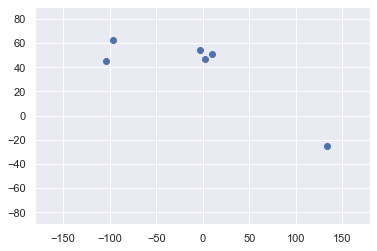

In [62]:
plt.scatter(data['Longitude'] , data['Latitude'])
plt.xlim(-180,180)  #to fit the limits of the latitude and longitude
plt.ylim(-90,90)
plt.show()

## Select the features

In [63]:
#clustering based on location

x = data.iloc[: , 1:4] #iloc method splits the data
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [64]:
kmeans = KMeans(2)

In [65]:
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering Results

In [66]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [67]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


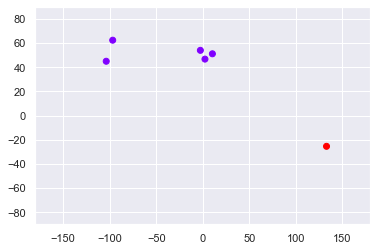

In [68]:
plt.scatter(data['Longitude'] , data['Latitude'] , c = data_with_clusters['Clusters'] , cmap='rainbow')
plt.xlim(-180,180) 
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

In [69]:
#getting the wcss

kmeans.inertia_

13208.958119999996

In [71]:
wcss = []

for i in range(1,7) : #no of observations
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

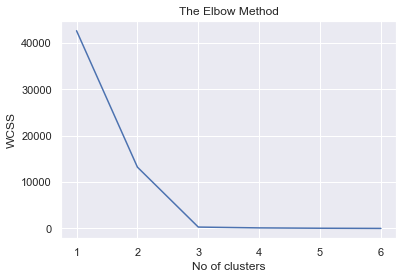

In [72]:
number_clusters = range(1,7)
plt.plot(number_clusters , wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

two elbows are there at 2 and 3
but 3 is optimal 